In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/data_myself/vision.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: Training/glioma/Tr-gl_0712.jpg  
  inflating: Training/glioma/Tr-gl_0713.jpg  
  inflating: Training/glioma/Tr-gl_0714.jpg  
  inflating: Training/glioma/Tr-gl_0715.jpg  
  inflating: Training/glioma/Tr-gl_0716.jpg  
  inflating: Training/glioma/Tr-gl_0717.jpg  
  inflating: Training/glioma/Tr-gl_0718.jpg  
  inflating: Training/glioma/Tr-gl_0719.jpg  
  inflating: Training/glioma/Tr-gl_0720.jpg  
  inflating: Training/glioma/Tr-gl_0721.jpg  
  inflating: Training/glioma/Tr-gl_0722.jpg  
  inflating: Training/glioma/Tr-gl_0723.jpg  
  inflating: Training/glioma/Tr-gl_0724.jpg  
  inflating: Training/glioma/Tr-gl_0725.jpg  
  inflating: Training/glioma/Tr-gl_0726.jpg  
  inflating: Training/glioma/Tr-gl_0727.jpg  
  inflating: Training/glioma/Tr-gl_0728.jpg  
  inflating: Training/glioma/Tr-gl_0729.jpg  
  inflating: Training/glioma/Tr-gl_0730.jpg  
  inflating: Training/glioma/Tr-gl_0731.jpg  
  inflating: Training/g

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout
from sklearn.metrics import accuracy_score

In [ ]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

Train test splip


In [ ]:
import os
import numpy as np
X_train = []
y_train = []

img_size = 150
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in labels:
  folderPath = os.path.join('/content/Training', i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath, j))
    img = cv2.resize(img, (img_size, img_size))
    X_train.append(img)
    y_train.append(i)

for i in labels:
  folderPath = os.path.join('/content/Testing', i)
  for j in os.listdir(folderPath):
    img = cv2.imread(os.path.join(folderPath, j))
    img = cv2.resize(img, (img_size, img_size))
    X_train.append(img)
    y_train.append(i)

X_train = np.array(X_train)
y_train = np.array(y_train)


In [ ]:
# train
X_train = np.array(X_train)
y_train = np.array(y_train)

print(X_train.shape)
print(y_train.shape)

(7023, 150, 150, 3)
(7023,)


In [ ]:
X_train, y_train = shuffle(X_train, y_train, random_state= 101)
X_train.shape

(7023, 150, 150, 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train,
                                                    test_size=0.1, random_state=101)


In [ ]:
y_train_new = []
for i in y_train:
  y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
  y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape=(150,150,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 conv2d_10 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 73, 73, 64)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 73, 73, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 71, 71, 64)        36928     
                                                                 
 conv2d_12 (Conv2D)          (None, 69, 69, 64)        36928     
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_split=0.1)

Epoch 1/50
178/178 [==============================] - 21s 97ms/step - loss: 1.5737 - accuracy: 0.4763 - val_loss: 0.7689 - val_accuracy: 0.6883
Epoch 2/50
178/178 [==============================] - 17s 94ms/step - loss: 0.6693 - accuracy: 0.7219 - val_loss: 0.6453 - val_accuracy: 0.7326
Epoch 3/50
178/178 [==============================] - 17s 93ms/step - loss: 0.5087 - accuracy: 0.7924 - val_loss: 0.5843 - val_accuracy: 0.7484
Epoch 4/50
178/178 [==============================] - 17s 95ms/step - loss: 0.4472 - accuracy: 0.8179 - val_loss: 0.5270 - val_accuracy: 0.7595
Epoch 5/50
178/178 [==============================] - 17s 95ms/step - loss: 0.3721 - accuracy: 0.8504 - val_loss: 0.6257 - val_accuracy: 0.7199
Epoch 6/50
178/178 [==============================] - 17s 95ms/step - loss: 0.3232 - accuracy: 0.8759 - val_loss: 0.3128 - val_accuracy: 0.8845
Epoch 7/50
178/178 [==============================] - 17s 94ms/step - loss: 0.2624 - accuracy: 0.8986 - val_loss: 0.3239 - val_accuracy:

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

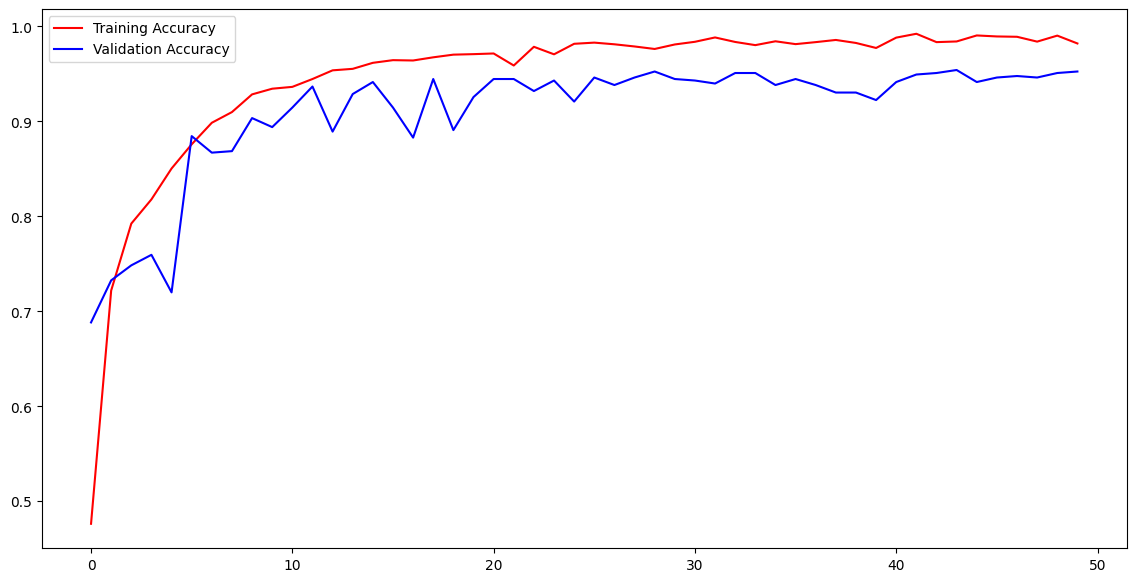

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

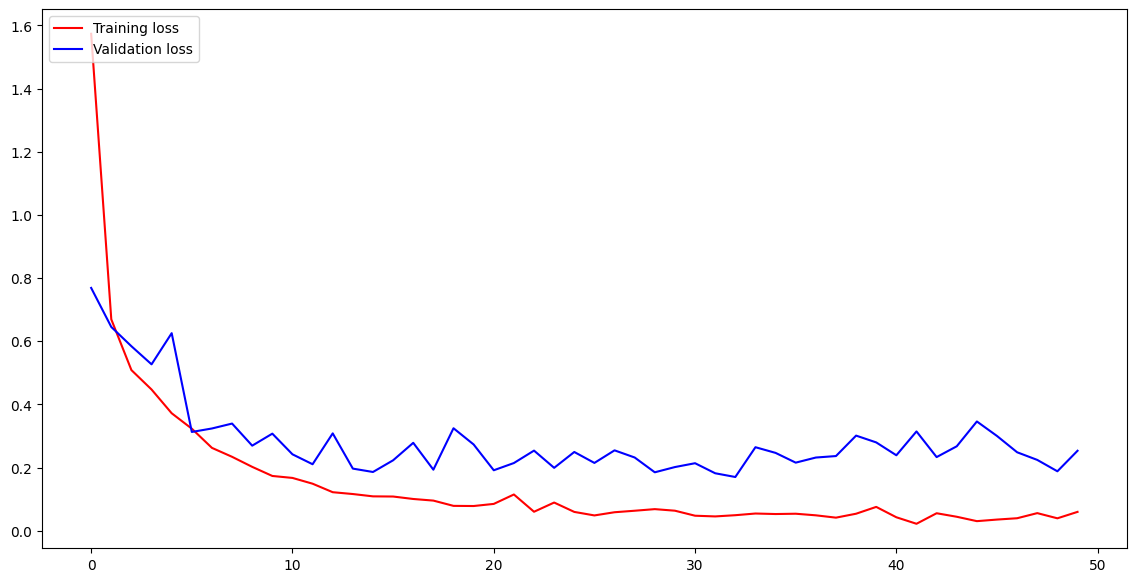

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [ ]:
y_hat = model.predict(X_test)
def predict(y_hat):
    y_hat[y_hat >= 0.5] =1
    y_hat[y_hat<0.5] =0
    return y_hat
y_pred = predict(y_hat)

22/22 [==============================] - 1s 20ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
report = classification_report(y_test, y_pred, target_names=labels)
print(report)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")

              precision    recall  f1-score   support

      glioma       0.96      0.95      0.96       170
  meningioma       0.92      0.94      0.93       175
     notumor       0.99      0.97      0.98       202
   pituitary       0.97      0.99      0.98       156

   micro avg       0.96      0.96      0.96       703
   macro avg       0.96      0.96      0.96       703
weighted avg       0.96      0.96      0.96       703
 samples avg       0.96      0.96      0.96       703

Accuracy: 0.9587482219061166


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


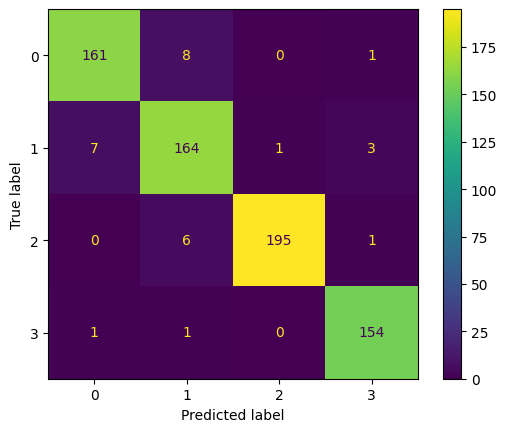

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
model.save('model1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('/content/model1.h5')

(512, 512, 3)


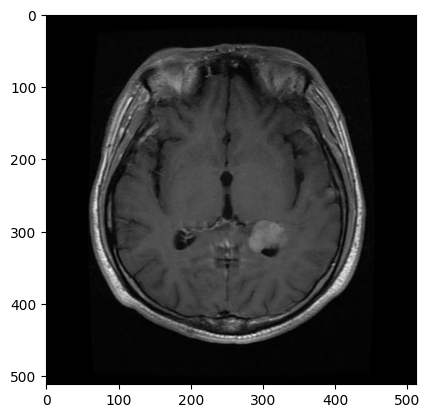

In [ ]:
import cv2
img = cv2.imread('/content/Training/meningioma/Tr-meTr_0002.jpg')
print(img.shape)
plt.imshow(img)

(512, 512, 3)


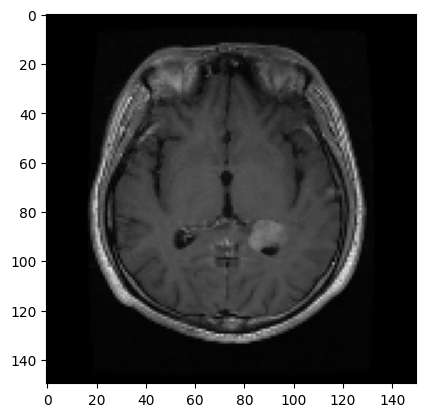

In [ ]:
# gray_img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_new = cv2.resize(img, (150,150))
print(img.shape)
plt.imshow(img_new,cmap = 'gray')

In [ ]:
img_scaled = np.array([img_new/255])
print(img_scaled.shape)
y_hat = model1.predict(img_scaled)
classes=['glioma', 'meningioma', 'notumor', 'pituitary']
result = classes[np.argmax(y_hat)]
print(y_hat)
print(np.argmax(y_hat))
print(result)

(1, 150, 150, 3)
1/1 [==============================] - 0s 18ms/step
[[9.5333225e-01 4.7431331e-05 4.6618640e-02 1.7109028e-06]]
0
glioma
